# Classifying Newswires
## Multi-class classification

## Loading the Reuters dataset
1. Loading the Reuters dataset

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2. Encoding the data

In [6]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(train_labels)
y_test_vec = to_one_hot(test_labels)

3. Partition the training set to training and validation sets

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train_vec[:1000]
partial_y_train = y_train_vec[1000:]

## Build the Model

In [12]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from keras import models
from keras import layers 

d1 = 64
d2 = 64

model = models.Sequential()
model.add(layers.Dense(d1, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(d2, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [18]:
from keras import optimizers

# optimization algorithm, learning rate, loss function, metrix
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# batch size, number of epochs
history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=9, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 171us/step - loss: 0.0874 - acc: 0.9573 - val_loss: 1.4564 - val_acc: 0.7740
Epoch 2/9
7982/7982 [==============================] - 0s 62us/step - loss: 0.0703 - acc: 0.9575 - val_loss: 1.5164 - val_acc: 0.7730
Epoch 3/9
7982/7982 [==============================] - 0s 62us/step - loss: 0.0693 - acc: 0.9592 - val_loss: 1.4842 - val_acc: 0.7830
Epoch 4/9
7982/7982 [==============================] - 0s 63us/step - loss: 0.0688 - acc: 0.9580 - val_loss: 1.5483 - val_acc: 0.7710
Epoch 5/9
7982/7982 [==============================] - 1s 63us/step - loss: 0.0688 - acc: 0.9583 - val_loss: 1.5487 - val_acc: 0.7750
Epoch 6/9
7982/7982 [==============================] - 1s 64us/step - loss: 0.0676 - acc: 0.9602 - val_loss: 1.5437 - val_acc: 0.7720
Epoch 7/9
7982/7982 [==============================] - 1s 64us/step - loss: 0.0670 - acc: 0.9578 - val_loss: 1.5413 - val_acc: 0.7790
Epoch 8/9
798

## Examine the Results

1. Plot the training and validation loss against epochs

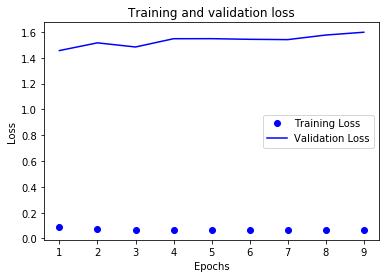

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2. Plot the training and validation accuracy agains epochs

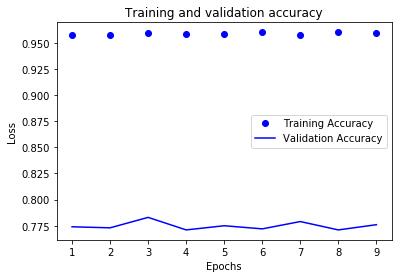

In [20]:
plt.clf()

acc = history.history['acc']
epochs = range(1, len(acc) + 1)

train_acc = history.history['acc']
valid_acc = history.history['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()